In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Understanding the directory structure

In [2]:
#Getting the paths to the files containing images
path=r'D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset'
os.chdir(path)
file_path=[]
for x in os.listdir(path):
    if os.path.isdir(x):
        data_path=os.path.join(path,x)
        # print(data_path)
        file_path.append(data_path)
file_path

['D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\001',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\002',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\003',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\004',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\005',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\006',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\007',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\008',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\009',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\010',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\011',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\012',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\013',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\014',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\015',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\016',
 'D:\\ML@6\\Exercises\\Ear_Biometry_100\\AWEDataset\\017

In [3]:
for x in os.listdir(file_path[0]):
    if x.split('.')[-1] == 'png':
        print(x)

01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
09.png
10.png


# Deleting unrequired images

In [4]:
for i in range(len(file_path)):
    for x in os.listdir(file_path[i]):
        if x.split('.')[0] not in ['01','02','03','04','05','06','07','08','09','10']:
            os.remove(os.path.join(file_path[i],x))

# Deleting non-image folders (e.g. annotation.json) from the data

In [37]:
#Deleting non-image files
for i in range(len(file_path[:-1])):
    for x in os.listdir(file_path[i]):
        if x.split('.')[-1] != 'png':
            os.remove(os.path.join(file_path[i],x))

# Overview of the data concentration in each folder

In [5]:
#counting images folderwise
for i in range(len(file_path[:-1])):
    print('\n','Folder->',file_path[i].split('\\')[-1])
    print(f"Count->{len(os.listdir(file_path[i]))}")
    # for x in os.listdir(file_path[i]):
        # if x.split('.')[-1] == 'png':
            # print(x)


 Folder-> 001
Count->10

 Folder-> 002
Count->10

 Folder-> 003
Count->10

 Folder-> 004
Count->10

 Folder-> 005
Count->10

 Folder-> 006
Count->10

 Folder-> 007
Count->10

 Folder-> 008
Count->10

 Folder-> 009
Count->10

 Folder-> 010
Count->10

 Folder-> 011
Count->10

 Folder-> 012
Count->10

 Folder-> 013
Count->10

 Folder-> 014
Count->10

 Folder-> 015
Count->10

 Folder-> 016
Count->10

 Folder-> 017
Count->10

 Folder-> 018
Count->10

 Folder-> 019
Count->10

 Folder-> 020
Count->10

 Folder-> 021
Count->10

 Folder-> 022
Count->10

 Folder-> 023
Count->10

 Folder-> 024
Count->10

 Folder-> 025
Count->10

 Folder-> 026
Count->10

 Folder-> 027
Count->10

 Folder-> 028
Count->10

 Folder-> 029
Count->10

 Folder-> 030
Count->10

 Folder-> 031
Count->10

 Folder-> 032
Count->10

 Folder-> 033
Count->10

 Folder-> 034
Count->10

 Folder-> 035
Count->10

 Folder-> 036
Count->10

 Folder-> 037
Count->10

 Folder-> 038
Count->10

 Folder-> 039
Count->10

 Folder-> 040
Count->10


In [9]:
os.path.exists(r'D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset')

True

# Data Augmentation

#Generator object
gen = ImageDataGenerator(rotation_range=40,horizontal_flip=True,fill_mode='nearest')

for path in file_path:
   for img_file in os.listdir(path):
      if(img_file.split('.')[-1]=='png'):
        #join paths to get the path to images
        img_path=os.path.join(path,img_file) #full path to an image
        #Load and reshape the image
        img=load_img(img_path)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)
      #   suffix=path.split("\\")[-1]
      #   save_path=f"D:\ML@6\Exercises\Ear_Biometry\AWEDataset\preview_{suffix}"
      #   if os.path.exists(save_path):
      #      pass
      #   else:
         #   os.mkdir(f"D:\ML@6\Exercises\Ear_Biometry\AWEDataset\preview_{suffix}")
        prefix=path.split('\\')[-1]
        i=1
        for batch in gen.flow(x,batch_size=1,save_to_dir=path,save_prefix=prefix,save_format='png'):
           i+=1
           if i>10:
              break


#### DO NOT RUN THIS CELL TWICE

In [6]:
#Generator object
gen_6 = ImageDataGenerator(rotation_range=3,horizontal_flip=True,fill_mode='nearest') #generate images with 3 degree rotation
# gen_3 = ImageDataGenerator(rotation_range=6,horizontal_flip=True,fill_mode='nearest') #generate images with 6 degree rotation

for path in file_path:
   for img_file in os.listdir(path):
      if(img_file.split('.')[-1]=='png'):
        #join paths to get the path to images
        img_path=os.path.join(path,img_file) #full path to an image
        #Load and reshape the image
        img=load_img(img_path)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)
        prefix=path.split('\\')[-1]
        i=1
        for batch in gen_6.flow(x,batch_size=1,save_to_dir=path,save_prefix=prefix,save_format='png'):
           i+=1
           if i>9: 
              break
      #   for batch in gen_6.flow(x,batch_size=1,save_to_dir=path,save_prefix=prefix,save_format='png'):
      #      i+=1
      #      if i>2: 
      #         break


# Split into train test folders

In [7]:
import splitfolders
split_path=os.mkdir(r"D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset\Split_Data") #creating a file to store the split folders
splitfolders.ratio(r"D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset", output=r"D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset\Split_Data",seed=7, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

Copying files: 9953 files [00:03, 2509.95 files/s]


# Creating Train,Test,Validation batches

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [9]:
train_path = r'D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset\Split_Data\train'
valid_path = r'D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset\Split_Data\val'
test_path = r'D:\ML@6\Exercises\Ear_Biometry_100\AWEDataset\Split_Data\test'

In [10]:
#used keras' pre-defined preprocessing function for image preprocessing 
train_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_ds=train_gen.flow_from_directory(directory=train_path, target_size=(224,224),batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
valid_ds=valid_gen.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=32)

test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_ds=test_gen.flow_from_directory(directory=test_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 6953 images belonging to 100 classes.
Found 1966 images belonging to 100 classes.
Found 1034 images belonging to 100 classes.


# Visualize the images

In [11]:
imgs, labels = next(train_ds) #imgs is a numpy array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

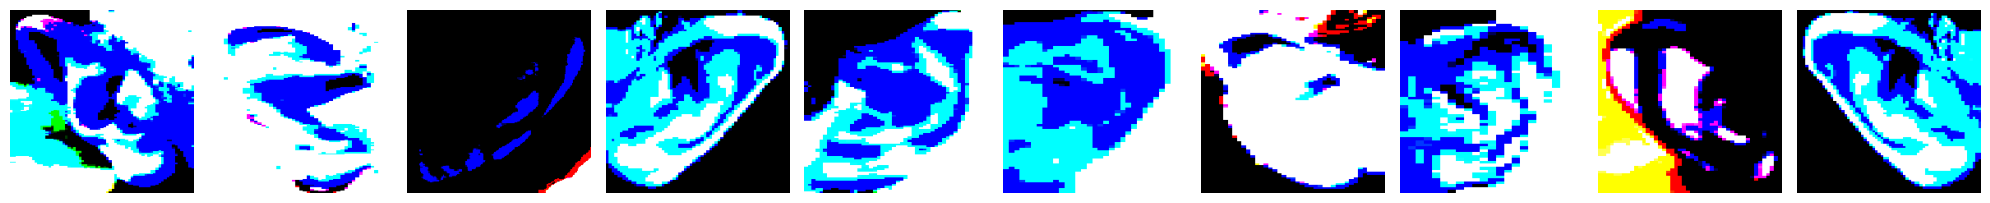

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

# Build Model

### Extracting the convolutional layers of the resnet50 architecture

In [13]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

# Model 1
#### Modifying the last fully connected layers

In [33]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(100, activation='softmax')(x)
model_1 = Model(inputs = resnet_50.input, outputs = predictions)

In [34]:
model_1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

# Training the model
#### Used early stopping and learning rate 0.0001

In [50]:
import tensorflow.keras
es=keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10,
    mode="max",
    restore_best_weights=False,
)

# First 25 epochs with learning rate = 0.001

In [36]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_1 = model_1.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=25,verbose=1,callbacks=[es])

Epoch 1/25
218/218 [==============================] - 319s 1s/step - loss: 4.5769 - accuracy: 0.0269 - val_loss: 4.0794 - val_accuracy: 0.1333
Epoch 2/25
218/218 [==============================] - 317s 1s/step - loss: 3.9019 - accuracy: 0.1110 - val_loss: 3.0535 - val_accuracy: 0.3739
Epoch 3/25
218/218 [==============================] - 315s 1s/step - loss: 3.2139 - accuracy: 0.2111 - val_loss: 2.2749 - val_accuracy: 0.4995
Epoch 4/25
218/218 [==============================] - 315s 1s/step - loss: 2.6311 - accuracy: 0.3168 - val_loss: 1.6457 - val_accuracy: 0.6541
Epoch 5/25
218/218 [==============================] - 319s 1s/step - loss: 2.3037 - accuracy: 0.3853 - val_loss: 1.3147 - val_accuracy: 0.7431
Epoch 6/25
218/218 [==============================] - 318s 1s/step - loss: 2.0097 - accuracy: 0.4486 - val_loss: 0.9512 - val_accuracy: 0.8479
Epoch 7/25
218/218 [==============================] - 316s 1s/step - loss: 1.7950 - accuracy: 0.4926 - val_loss: 0.7664 - val_accuracy: 0.8550

In [38]:
model_1.save("AWE_100_first_fity_epochs.h5")

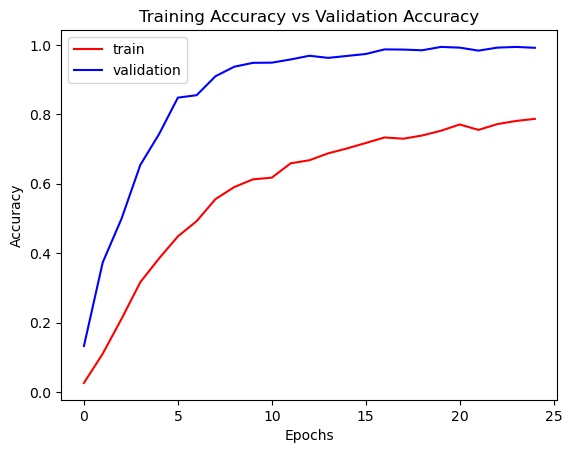

In [39]:
plt.plot(history_1.history['accuracy'],color='red',label='train')
plt.plot(history_1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.show()

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

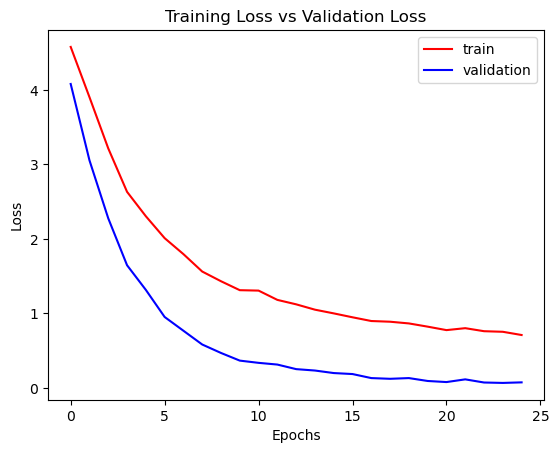

In [40]:
plt.plot(history_1.history['loss'],color='red',label='train')
plt.plot(history_1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")

In [41]:
predictions = model_1.predict(x=test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

In [42]:
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
0
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
67
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
0
26
26
0
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
35
35
35
35

#### Train Test accuracy and loss after first 25 epochs

In [43]:
train_loss,train_acc=model_1.evaluate(train_ds)
test_loss,test_acc=model_1.evaluate(test_ds)
print(f"Train Loss:{train_loss*100}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss*100}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 39s 1s/step - loss: 0.0613 - accuracy: 0.9932
Train Loss:3.4106455743312836	Train Accuracy=99.87055659294128
Test Loss=6.127911061048508	Test Accuracy=99.32301640510559


# Loading the last model and training it for 25  more epochs

In [44]:
from tensorflow import keras
from keras.models import load_model

In [45]:
new_model=load_model("AWE_100_first_fity_epochs.h5")
history_new = new_model.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=25,verbose=1,callbacks=[es])

Epoch 1/25
218/218 [==============================] - 315s 1s/step - loss: 0.7059 - accuracy: 0.7886 - val_loss: 0.0851 - val_accuracy: 0.9914
Epoch 2/25
218/218 [==============================] - 311s 1s/step - loss: 0.6932 - accuracy: 0.7925 - val_loss: 0.0614 - val_accuracy: 0.9959
Epoch 3/25
218/218 [==============================] - 311s 1s/step - loss: 0.7032 - accuracy: 0.7830 - val_loss: 0.0705 - val_accuracy: 0.9914
Epoch 4/25
218/218 [==============================] - 299s 1s/step - loss: 0.6805 - accuracy: 0.7976 - val_loss: 0.0507 - val_accuracy: 0.9939
Epoch 5/25
218/218 [==============================] - 308s 1s/step - loss: 0.6711 - accuracy: 0.7939 - val_loss: 0.0652 - val_accuracy: 0.9964
Epoch 6/25
218/218 [==============================] - 298s 1s/step - loss: 0.6696 - accuracy: 0.7988 - val_loss: 0.0553 - val_accuracy: 0.9959
Epoch 7/25
218/218 [==============================] - 299s 1s/step - loss: 0.6958 - accuracy: 0.7820 - val_loss: 0.0496 - val_accuracy: 0.9975

#### Train Test accuracy and loss after a total of 50 epochs (i.e., after 25 more epochs)

In [47]:
train_loss,train_acc=new_model.evaluate(train_ds)
test_loss,test_acc=new_model.evaluate(test_ds)
print(f"Train Loss:{train_loss}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 34s 1s/step - loss: 0.0260 - accuracy: 0.9981
Train Loss:0.01061760913580656	Train Accuracy=99.9712347984314
Test Loss=0.02596062421798706	Test Accuracy=99.80657696723938


# Repeating the same process but this time with a learning rate=0.0001 and for 50 epochs

In [48]:
new_model.save("First_fifty.h5")

In [51]:
next_fifty=load_model("First_fifty.h5")
next_fifty.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_new = next_fifty.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=50,verbose=1,callbacks=[es])

Epoch 1/50
218/218 [==============================] - 315s 1s/step - loss: 0.4092 - accuracy: 0.8736 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 2/50
218/218 [==============================] - 298s 1s/step - loss: 0.3767 - accuracy: 0.8849 - val_loss: 0.0115 - val_accuracy: 0.9990
Epoch 3/50
218/218 [==============================] - 299s 1s/step - loss: 0.3506 - accuracy: 0.8907 - val_loss: 0.0117 - val_accuracy: 0.9990
Epoch 4/50
218/218 [==============================] - 298s 1s/step - loss: 0.3312 - accuracy: 0.8941 - val_loss: 0.0113 - val_accuracy: 0.9985
Epoch 5/50
218/218 [==============================] - 297s 1s/step - loss: 0.3407 - accuracy: 0.8941 - val_loss: 0.0111 - val_accuracy: 0.9985
Epoch 6/50
218/218 [==============================] - 286s 1s/step - loss: 0.3481 - accuracy: 0.8872 - val_loss: 0.0120 - val_accuracy: 0.9980
Epoch 7/50
218/218 [==============================] - 309s 1s/step - loss: 0.3171 - accuracy: 0.9044 - val_loss: 0.0104 - val_accuracy: 0.9995

#### Train and test accuracy after more 50 epochs i.e., after a total of 100 epochs

In [54]:
train_loss,train_acc=next_fifty.evaluate(train_ds)
test_loss,test_acc=next_fifty.evaluate(test_ds)
print(f"Train Loss:{train_loss}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 36s 1s/step - loss: 0.0039 - accuracy: 0.9990
Train Loss:0.0009456659317947924	Train Accuracy=100.0
Test Loss=0.0039360010996460915	Test Accuracy=99.90328550338745


In [55]:
next_fifty.save("Last_model.h5")

# The result has now become saturated so running last 50 epochs to see if any improvement is gained 

In [56]:
final_model=load_model("Last_model.h5")
final_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_new = final_model.fit(train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds,validation_steps=len(valid_ds),epochs=50,verbose=1,callbacks=[es])

Epoch 1/50
218/218 [==============================] - 294s 1s/step - loss: 0.2342 - accuracy: 0.9245 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 2/50
218/218 [==============================] - 282s 1s/step - loss: 0.2353 - accuracy: 0.9242 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 3/50
218/218 [==============================] - 280s 1s/step - loss: 0.2484 - accuracy: 0.9192 - val_loss: 0.0057 - val_accuracy: 0.9995
Epoch 4/50
218/218 [==============================] - 301s 1s/step - loss: 0.2313 - accuracy: 0.9265 - val_loss: 0.0049 - val_accuracy: 0.9995
Epoch 5/50
218/218 [==============================] - 309s 1s/step - loss: 0.2403 - accuracy: 0.9256 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 6/50
218/218 [==============================] - 309s 1s/step - loss: 0.2253 - accuracy: 0.9278 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 7/50
218/218 [==============================] - 308s 1s/step - loss: 0.2374 - accuracy: 0.9275 - val_loss: 0.0055 - val_accuracy: 0.9990

# A maximum training accuracy of 93.8% was observed in the 16th epoch of the training but overall the training accuracy stopped in (92,93) 

In [59]:
final_model.save("Final_model.h5")

#### Train test accuracy and loss after last 50 epochs i.e., a total of 150 epochs

In [57]:
train_loss,train_acc=final_model.evaluate(train_ds)
test_loss,test_acc=final_model.evaluate(test_ds)
print(f"Train Loss:{train_loss}\tTrain Accuracy={train_acc*100}\nTest Loss={test_loss}\tTest Accuracy={test_acc*100}")

33/33 [==============================] - 32s 977ms/step - loss: 0.0020 - accuracy: 1.0000
Train Loss:0.0005738589679822326	Train Accuracy=100.0
Test Loss=0.0020309225656092167	Test Accuracy=100.0


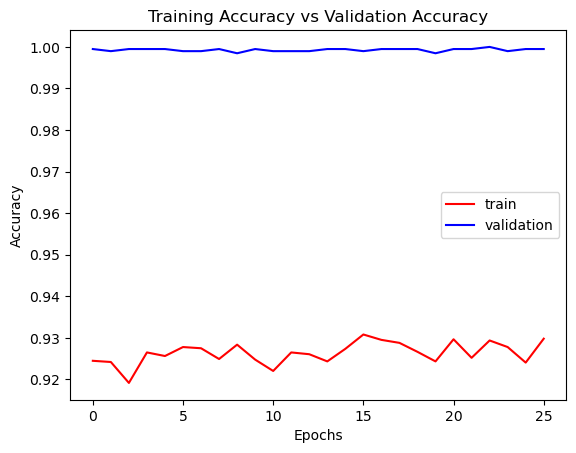

In [58]:
plt.plot(history_new.history['accuracy'],color='red',label='train')
plt.plot(history_new.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.show()

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

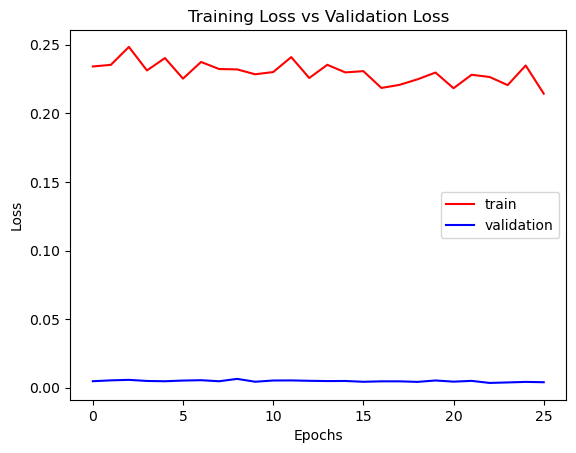

In [60]:
plt.plot(history_new.history['loss'],color='red',label='train')
plt.plot(history_new.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")

In [61]:
predictions = final_model.predict(x=test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
35
35
35


## Inference:
The model was trained for a total of 150 epochs where<br>
1.The first 50 epochs were trained with a learning rate of 0.001<br>
2. The last 100 epochs werer trained with a learning rate of 0.0001<br>

#### The overall / avg 'training accuracy' shown upon 'evaluating' the model was 99.96
#### The overall / avg 'testing accuracy' shown upon 'evaluating' the model was 99.76
<br>
The model gives at most one misprediction rarely for few classes